In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [3]:
train_dataset = pd.read_csv('fraudTrain.csv')

In [4]:
test_dataset = pd.read_csv('fraudTest.csv')

In [5]:
train_dataset.head() 

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
test_dataset.head() 

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


### Drop Uneccessary Column

In [9]:
drop_cols = ['trans_date_trans_time', 'cc_num', 'first', 'last', 'dob', 'street', 'city',
             'state', 'zip', 'lat', 'long', 'job', 'merchant', 'unix_time', 'trans_num']
train_dataset.drop(columns=drop_cols, inplace=True, errors='ignore')
test_dataset.drop(columns=drop_cols, inplace=True, errors='ignore')

### Encode 

In [12]:
combined = pd.concat([train_dataset, test_dataset])
combined = pd.get_dummies(combined, drop_first=True) 

train_encoded = combined.iloc[:len(train_dataset)]
test_encoded = combined.iloc[len(train_dataset):]

### Train And Test

In [13]:
X_train = train_encoded.drop('is_fraud', axis=1)
y_train = train_encoded['is_fraud']
X_test = test_encoded.drop('is_fraud', axis=1)
y_test = test_encoded['is_fraud'] 

### Feature Scaling 

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [16]:
lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))

Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93    553574
           1       0.02      0.74      0.04      2145

    accuracy                           0.86    555719
   macro avg       0.51      0.80      0.48    555719
weighted avg       1.00      0.86      0.92    555719



### Decision Tree

In [17]:
dt = DecisionTreeClassifier(max_depth=6, class_weight='balanced')
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree:\n", classification_report(y_test, y_pred_dt))


Decision Tree:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.06      0.93      0.12      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.94      0.55    555719
weighted avg       1.00      0.95      0.97    555719



### ROC Curve Comparision

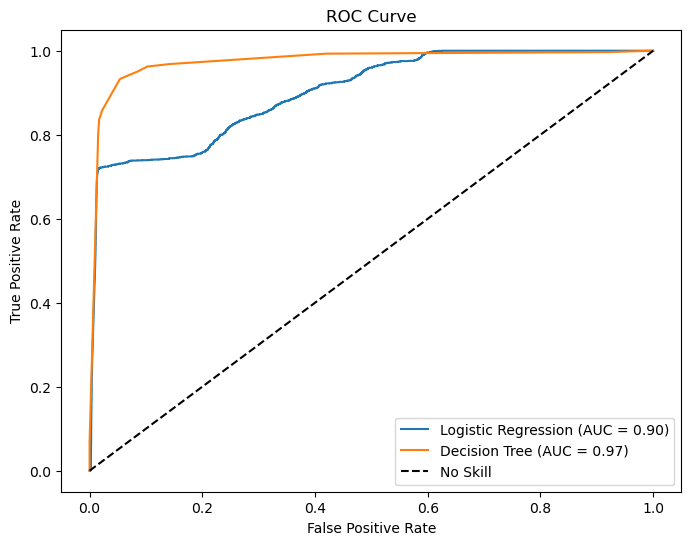

In [19]:
models = [lr, dt]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
X_tests = [X_test_scaled, X_test, X_test]  # match scaled/unscaled inputs

plt.figure(figsize=(8, 6))

for model, name, X in zip(models, model_names, X_tests):
    y_prob = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
